In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [7]:
dataset = fetch_california_housing()

Before we get started with the dataset we should get a brief overview and idea of the dataset we are going to be using

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
print("The independant feature dataset for the California Housing dataset dimension is: ", dataset['data'].shape)
print("The dependant feature dataset for the California Housing dataset dimension is: ", dataset['target'].shape)

The independant feature dataset for the California Housing dataset dimension is:  (20640, 8)
The dependant feature dataset for the California Housing dataset dimension is:  (20640,)


In [18]:
X = dataset['data']
Y = dataset['target']

Text(0.5, 0, 'Avj_occupancy')
Text(0, 0.5, 'Median_House_Price')


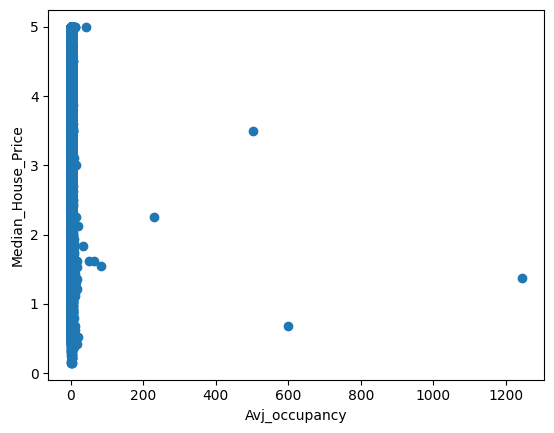

In [45]:

print(plt.scatter(X[...,5],Y))
print(plt.xlabel("Avj_occupancy"))
print(plt.ylabel('Median_House_Price'))
## Drop = avg_occupancy,


The reason for keeping only this particular plot is that to show that earlier I though that it was the parameter average occupnacy that didnt have any significant effect in the final outcome but it was large outlier nature of the dataset that was actually detrmining the max and min range of the avj_occupancy, so it cant be ruled out actually.

In here I am taking into account 7 features out of the total 8 input features, as I feel like the feature No of bedrooms wont affect the price of the house to a respectable extent

In [73]:
X = dataset['data'][..., [0, 1, 2, 4, 5, 6, 7]]
Y = dataset['target']

Now this is a pretty important and new addition that I would though would be pretty cool to add that is the additional parameter random_state = 42. I actually set a specific value for random_state, the data splitting will be the same every time I run the code with that particular seed. This is useful for reproducibility and consistency in further iterations.

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [88]:
X_train.shape

(16512, 7)

In [89]:
X_test.shape

(4128, 7)

In [90]:
Y_train.shape

(16512,)

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, Y_train)

LinearRegression()

In [93]:
Y_predicted = model.predict(X_test)

Now in order to evaluate the Linear Regression model that we have built we have to use accuracy metrics like R2-score and Mean Squared Error to find out the accuracy of the model that we have built
---



In [94]:
R2_error_score = r2_score(Y_test, Y_predicted)
mse_error_score = mean_squared_error(Y_test, Y_predicted)

In [95]:
print("R2 score is: ", R2_error_score)
print("The mean squared value for the linear regression model is: ",mse_error_score)

R2 score is:  0.5823239094526462
The mean squared value for the linear regression model is:  0.5473264990498113


Now just for the sake of experiment and purpose of curiosity we will try and look for including every single feature into the model and try and fugure if it affects the model accuracy in a positve or negative manner

In [60]:
X1 = dataset['data']
Y1 = dataset['target']


In [83]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [84]:
model.fit(X1_train, Y1_train)

LinearRegression()

In [85]:
Y1_predicted = model.predict(X1_test)

In [86]:
R2__score = r2_score(Y1_test, Y1_predicted)
print("R2_score: ", R2__score)
mse__error = mean_squared_error(Y1_test, Y1_predicted)
print("Mean Squared Error value: ", mse__error)

R2_score:  0.5757877060324524
Mean Squared Error value:  0.5558915986952422



Hence as an inference we can probably say that the inclusion of the extra parameter (No. of bedrooms) probably didnt contrbute to a significant positive delta as far the final accuracy is concerned.  
---

